<Axes: title={'center': 'Page Load Time for different number of parallel connections '}, xlabel='Website', ylabel='PLT (ms)'>

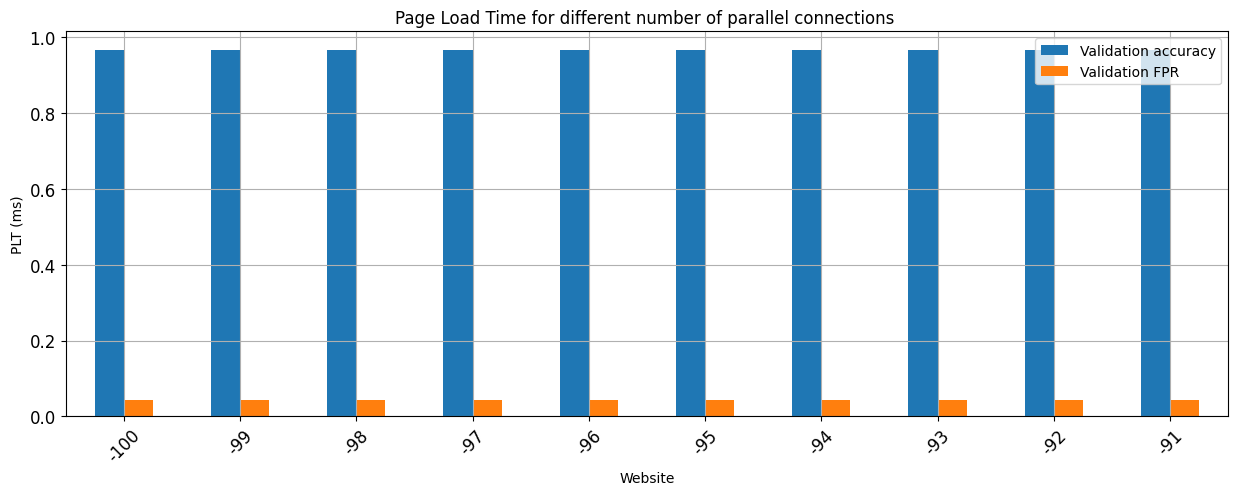

In [22]:
import pandas as pd
data=pd.read_csv('../data/fpr_analysis/naive_bayes_bias.csv')
data=data.set_index('Bias')
data.plot(kind='bar', title='Page Load Time for different number of parallel connections ',
          legend=True, grid=True, figsize=(15, 5), ylabel='PLT (ms)', fontsize=12, xlabel='Website', rot=45)

# Finding the optimal dimension of the vocabulary

In [30]:
import build_vocabulary as bv
import features_extraction as fe
import pvml
import pandas as pd
import make_statistics as ms
numWords = []
validation_accuracy = []
false_positive_rates = []
for voc_dim in range(500, 10001, 500):
    # Get the vocabulary and the BoW representation of the training and validation set
    voc = bv.get_vocabulary(path='../dataset/', numWords=voc_dim, save=False)
    X_train, Y_train = fe.get_bow_representation(voc)
    X_valid, Y_valid = fe.get_bow_representation(voc, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                                 clickbait_path='../dataset/clickbait_validation.txt')
    # Train the model and get the accuracy on the training and validation set
    w, b = pvml.multinomial_naive_bayes_train(X_train, Y_train)

    predictions_validation, score = pvml.multinomial_naive_bayes_inference(
        X_valid, w, b)
    accuracy_validation = (predictions_validation == Y_valid).mean()

    true_positive, true_negative, false_positive, false_negative, false_positive_rate = ms.calculate_metrics(
        Y_valid, predictions_validation)
    numWords.append(voc_dim)
    validation_accuracy.append(accuracy_validation*100)
    false_positive_rates.append(false_positive_rate*100)

results = pd.DataFrame({'Vocabulary size': numWords,
                       'Validation accuracy': validation_accuracy, 'Validation FPR': false_positive_rates})
results.to_csv('../data/fpr_analysis/naive_diff_voc_size.csv')

# Naive bayes without common words 

In [27]:
import build_vocabulary as bv
import features_extraction as fe
import pvml
import pandas as pd
import make_statistics as ms


words_to_ignore = []
f = open('../data/stopwords.txt', 'r')
n = 0
for w in f.read().split():
    words_to_ignore.append(w)
    n += 1
f.close()


numWords = []
validation_accuracy = []
false_positive_rates = []
for voc_dim in range(500, 10501, 500):
    # Get the vocabulary and the BoW representation of the training and validation set
    voc = bv.get_vocabulary(path='../dataset/', numWords=voc_dim, save=False)
    voc_no_common_words = [word for word in voc if word not in words_to_ignore]

    X_train, Y_train = fe.get_bow_representation(voc_no_common_words)
    X_valid, Y_valid = fe.get_bow_representation(voc_no_common_words, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                                 clickbait_path='../dataset/clickbait_validation.txt')
    # Train the model and get the accuracy on the training and validation set
    w, b = pvml.multinomial_naive_bayes_train(X_train, Y_train)

    predictions_validation, score = pvml.multinomial_naive_bayes_inference(
        X_valid, w, b)
    accuracy_validation = (predictions_validation == Y_valid).mean()

    true_positive, true_negative, false_positive, false_negative, false_positive_rate = ms.calculate_metrics(
        Y_valid, predictions_validation)
    numWords.append(voc_dim)
    validation_accuracy.append(accuracy_validation*100)
    false_positive_rates.append(false_positive_rate*100)

results = pd.DataFrame({'Vocabulary size': numWords,
                       'Validation accuracy': validation_accuracy, 'Validation FPR': false_positive_rates})
results.to_csv('../data/fpr_analysis/naive_diff_voc_size_no_common_words.csv')

# Naive bayes with stemming

In [28]:
import build_vocabulary as bv
import features_extraction as fe
import pvml
import pandas as pd
import make_statistics as ms
numWords = []
validation_accuracy = []
false_positive_rates = []
for voc_dim in range(500, 10501, 500):
    # Get the vocabulary and the BoW representation of the training and validation set
    voc = bv.get_vocabulary(path='../dataset/', numWords=voc_dim, save=False)
    X_train, Y_train = fe.get_bow_representation(voc, stemming=True)
    X_valid, Y_valid = fe.get_bow_representation(voc, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                                 clickbait_path='../dataset/clickbait_validation.txt', stemming=True)
    # Train the model and get the accuracy on the training and validation set
    w, b = pvml.multinomial_naive_bayes_train(X_train, Y_train)

    predictions_validation, score = pvml.multinomial_naive_bayes_inference(
        X_valid, w, b)
    accuracy_validation = (predictions_validation == Y_valid).mean()

    true_positive, true_negative, false_positive, false_negative, false_positive_rate = ms.calculate_metrics(
        Y_valid, predictions_validation)
    numWords.append(voc_dim)
    validation_accuracy.append(accuracy_validation*100)
    false_positive_rates.append(false_positive_rate*100)

results = pd.DataFrame({'Vocabulary size': numWords,
                       'Validation accuracy': validation_accuracy, 'Validation FPR': false_positive_rates})
results.to_csv('../data/fpr_analysis/naive_diff_voc_size_stemming.csv')

<Axes: title={'center': 'FPR of different features'}, xlabel='Vocabulary size', ylabel='False Positive Rate (%)'>

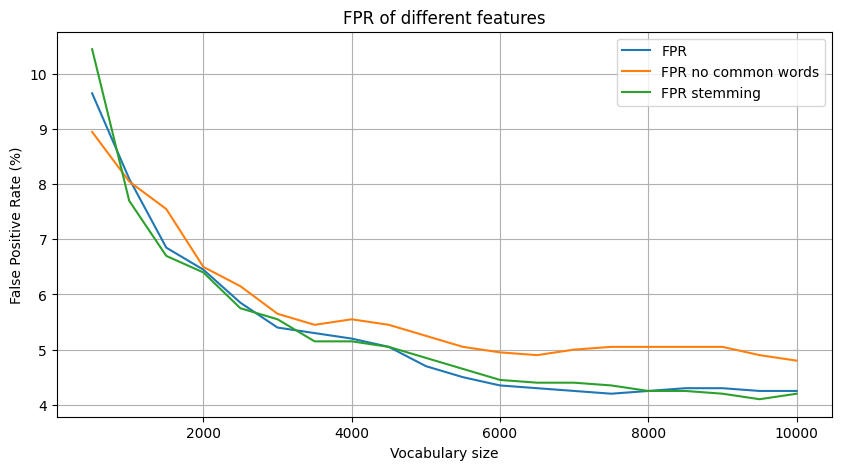

In [33]:
import pandas as pd

data = pd.read_csv('../data/fpr_analysis/naive_diff_voc_size.csv')
data_no_common = pd.read_csv('../data/fpr_analysis/naive_diff_voc_size_no_common_words.csv')
data_stemming = pd.read_csv('../data/fpr_analysis/naive_diff_voc_size_stemming.csv')
comparison = pd.DataFrame({'Vocabulary size': data['Vocabulary size'], 'FPR': data['Validation FPR'],
                          'FPR no common words': data_no_common['Validation FPR'],
                           'FPR stemming': data_stemming['Validation FPR']})


comparison.plot(kind='line', x='Vocabulary size', y=[
                'FPR', 'FPR no common words', 'FPR stemming'], figsize=(10, 5), grid=True,
                title='FPR of different features', ylabel='False Positive Rate (%)')

In [34]:
import build_vocabulary as bv
import features_extraction as fe
import pvml
import pandas as pd
import make_statistics as ms
biases = []
validation_accuracy = []
false_positive_rates = []
# Get the vocabulary and the BoW representation of the training and validation set
voc = bv.get_vocabulary(path='../dataset/', numWords=8000, save=False)
X_train, Y_train = fe.get_bow_representation(voc)
X_valid, Y_valid = fe.get_bow_representation(voc, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                             clickbait_path='../dataset/clickbait_validation.txt')
# Train the model and get the accuracy on the training and validation set
w, est_b = pvml.multinomial_naive_bayes_train(X_train, Y_train)

for bias in range(-10, 10):
    b = est_b + bias
    predictions_validation, score = pvml.multinomial_naive_bayes_inference(
        X_valid, w, b)
    accuracy_validation = (predictions_validation == Y_valid).mean()

    true_positive, true_negative, false_positive, false_negative, false_positive_rate = ms.calculate_metrics(
        Y_valid, predictions_validation)
    biases.append(b)
    validation_accuracy.append(accuracy_validation*100)
    false_positive_rates.append(false_positive_rate*100)

results = pd.DataFrame({'Bias': biases,
                       'Validation accuracy': validation_accuracy, 'Validation FPR': false_positive_rates})
results.to_csv('../data/fpr_analysis/naive_diff_bias.csv')

In [35]:
import pandas as pd

data= pd.read_csv('../data/fpr_analysis/naive_diff_bias.csv')
data

,Unnamed: 0,Bias,Validation accuracy,Validation FPR
0,0,[-10.69314718 -10.69314718],96.675,4.25
1,1,[-9.69314718 -9.69314718],96.675,4.25
2,2,[-8.69314718 -8.69314718],96.675,4.25
3,3,[-7.69314718 -7.69314718],96.675,4.25
4,4,[-6.69314718 -6.69314718],96.675,4.25
5,5,[-5.69314718 -5.69314718],96.675,4.25
6,6,[-4.69314718 -4.69314718],96.675,4.25
7,7,[-3.69314718 -3.69314718],96.675,4.25
8,8,[-2.69314718 -2.69314718],96.675,4.25
9,9,[-1.69314718 -1.69314718],96.675,4.25
